2022-02-17 15:23:11 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]
 beta_1 = 700.698084, beta_2 = 0.997113
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.91


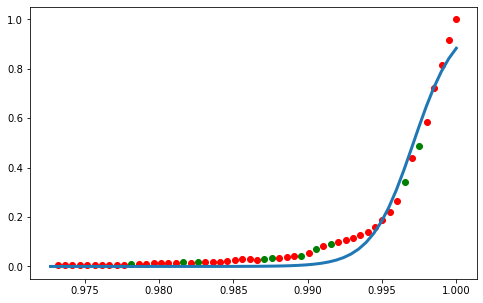

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

%matplotlib inline

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")

#plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
#plt.plot(x_data, y_data, 'ro')
#plt.ylabel('GDP')
#plt.xlabel('Year')
#plt.show()

# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
#plt.plot(x_data, Y_pred*15000000000000.)
#plt.plot(x_data, y_data, 'ro')

#popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
#print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

#x = np.linspace(1960, 2015, 55)
#x = x/max(x)
#plt.figure(figsize=(8,5))
#y = sigmoid(x, *popt)
#plt.plot(xdata, ydata, 'ro', label='data')
#plt.plot(x,y, linewidth=3.0, label='fit')
#plt.legend(loc='best')
#plt.ylabel('GDP')
#plt.xlabel('Year')
#plt.show()

msk = np.random.rand(len(df)) < 0.8
#train = df[msk]
#test = df[~msk]

train_x = xdata[msk]
train_y = ydata[msk]

test_x = xdata[~msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8,5))
plt.plot(train_x, train_y, 'ro', label='train data')
plt.plot(test_x, test_y, 'go', label='test data')
y = sigmoid(x, *popt)
plt.plot(x,y, linewidth=3.0, label='fit')

test_y_ = sigmoid(test_x, *popt)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )


